# STEP 1: Import Required Libraries

In [114]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import joblib

# STEP 2: Load Training Data

In [115]:
# Load training datasets
X_train_df = pd.read_csv('../data/X_train.csv')
y_train_df = pd.read_csv('../data/y_train.csv')


# STEP 3: Load the Saved Scaler and Scale X_train

In [116]:
# Load the previously saved scaler
scaler = joblib.load("model/scaler.pkl")

# Scale the training features
X_train_scaled = scaler.transform(X_train_df)


# STEP 4: Train the Random Forest Model

In [117]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train_df)


C:\Users\DELL\AppData\Local\Temp\ipykernel_11928\1408594017.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train_scaled, y_train_df)


RandomForestRegressor(random_state=42)

# STEP 5:  Evaluate Random Forest Model Using Regression Metrics

In [126]:
# Evaluate model with common regression metrics
mse = mean_squared_error(y_test, rf_predictions)
mae = mean_absolute_error(y_test, rf_predictions)
r2 = r2_score(y_test, rf_predictions)

print(f"📊 Random Forest Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")


📊 Random Forest Evaluation:
Mean Squared Error (MSE): 26.15
Mean Absolute Error (MAE): 3.41
R² Score: 0.91


# STEP 6: Generate Confidence Table — Actual vs Predicted Values

C:\Users\DELL\AppData\Local\Temp\ipykernel_11928\2191158219.py:9: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\DELL\anaconda3\envs\civil\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


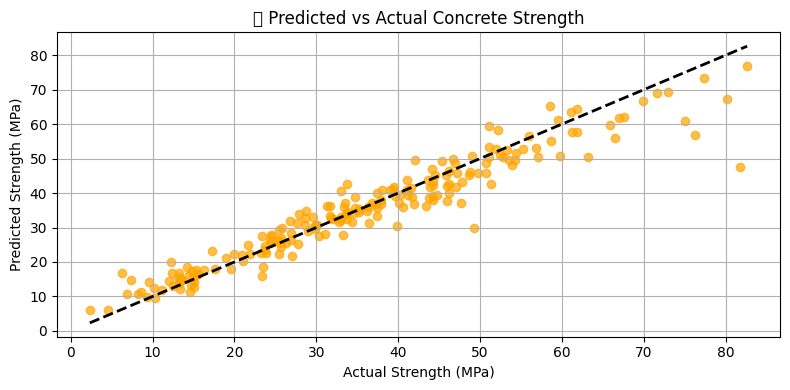

In [127]:
# 8. PLOT 1: Predicted vs Actual
plt.figure(figsize=(8, 4))
plt.scatter(y_test, rf_preds, color="orange", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
plt.xlabel("Actual Strength (MPa)")
plt.ylabel("Predicted Strength (MPa)")
plt.title("📈 Predicted vs Actual Concrete Strength")
plt.grid(True)
plt.tight_layout()
plt.show()

# STEP 7:  Error distribution

C:\Users\DELL\AppData\Local\Temp\ipykernel_11928\516410878.py:9: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\DELL\anaconda3\envs\civil\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


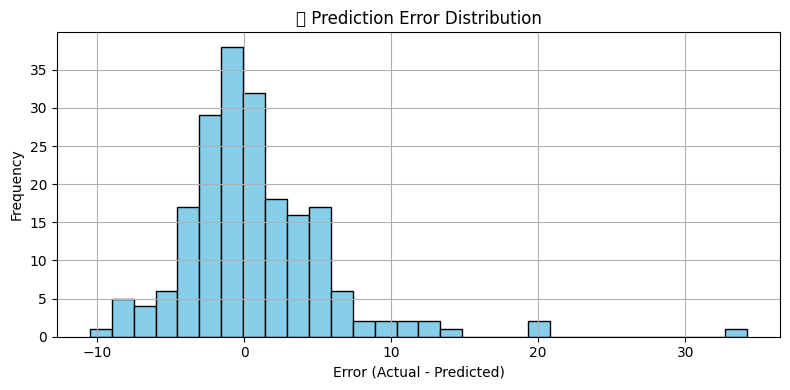

In [128]:
# 9. PLOT 2: Error Distribution
errors = y_test - rf_preds
plt.figure(figsize=(8, 4))
plt.hist(errors, bins=30, color="skyblue", edgecolor="black")
plt.title("📉 Prediction Error Distribution")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


# STEP 8: Generate Confidence Table — Actual vs Predicted Values

In [123]:
# Create table of true vs predicted values
confidence_rf = pd.DataFrame({
    'True_Value': y_test,
    'Predicted_Value': rf_predictions
})

# Save the confidence table
confidence_rf.to_csv("rf_confidence_table.csv", index=False)

# Show top 10 predictions
confidence_rf.head(10)

,True_Value,Predicted_Value
0,19.009543,21.256242
1,24.290929,26.406572
2,26.322815,25.497960
3,34.569637,34.103482
4,44.133359,47.000055
5,33.003837,32.172253
6,17.275511,23.051789
7,25.422359,22.410907
8,33.729166,33.832863
9,34.397958,31.487311


# Savinng the connfidence table

In [129]:
# Save the confidence table to CSV
confidence_rf.to_csv("model/rf_confidence_table.csv", index=False)

print("📁 Confidence table saved as 'rf_confidence_table.csv'")


📁 Confidence table saved as 'rf_confidence_table.csv'


#  Savinng the model

In [125]:
# 1. Import the joblib library
import joblib  # For saving/loading machine learning models

# 2. Save the trained Random Forest model
joblib.dump(rf_model, "model/rf_model.pkl")  # Save inside 'model' directory

# 3. Print confirmation message
print("✅ Random Forest model saved successfully as rf_model.pkl!")


✅ Random Forest model saved successfully as rf_model.pkl!
